In [12]:
from __future__ import print_function, division
from builtins import range


import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.random.seed(1)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z


# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [14]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

In [15]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)
    
    ret4 = Z.T.dot(T - Y)

    return ret4


In [16]:
def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape

   
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)


    return ret2


In [17]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)


def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)


In [51]:
def main():
    # create the data
    Nclass = 500
    D = 2 # dimensionality of input
    M = 3 # hidden layer size
    K = 3 # number of classes

    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2, 2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
    X = np.vstack([X1, X2, X3])
    
    print(X1.shape, X2.shape, X3.shape, X.shape)

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
    N = len(Y)
    print(Y.shape)
    print (N)
    
    # turn Y into an indicator matrix for training
    T = np.zeros((N, K))
    for i in range(N):
        T[i, Y[i]] = 1

    print (T)
    # let's see what it looks like
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()

    # randomly initialize weights
    W1 = np.random.randn(D, M) #input, hidden
    b1 = np.random.randn(M) #hidden
    W2 = np.random.randn(M, K) #hidden, output
    b2 = np.random.randn(K) #output

    learning_rate = 0.001
    costs = []
    W2M=[]
    for epoch in range(1000):
        output, hidden = forward(X, W1, b1, W2, b2)
        if epoch % 100 == 0:
            c = cost(T, output)
            P = np.argmax(output, axis=1)
            r = classification_rate(Y, P)
            print("cost:", c, "classification_rate:", r)
            costs.append(c)

        # this is gradient ASCENT, not DESCENT
        # be comfortable with both!
        
        W2 += learning_rate * derivative_w2(hidden, T, output)
        b2 += learning_rate * derivative_b2(T, output)
        W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
        b1 += learning_rate * derivative_b1(T, output, W2, hidden)
        

    plt.plot(costs)
    plt.show()
    
   
    

(500, 2) (500, 2) (500, 2) (1500, 2)
(1500,)
1500
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


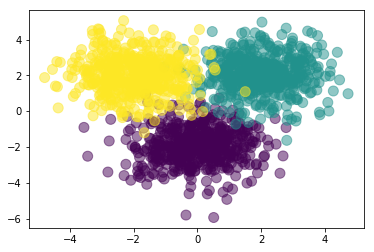

cost: -2243.2122409806693 classification_rate: 0.3333333333333333
cost: -151.7892343584869 classification_rate: 0.972
cost: -135.8413385629098 classification_rate: 0.972
cost: -131.63080507389438 classification_rate: 0.9726666666666667
cost: -129.6745047298037 classification_rate: 0.9713333333333334
cost: -128.46197198943676 classification_rate: 0.9713333333333334
cost: -127.57822005569949 classification_rate: 0.9713333333333334
cost: -126.87625525220028 classification_rate: 0.972
cost: -126.2940016282979 classification_rate: 0.972
cost: -125.800157557256 classification_rate: 0.972


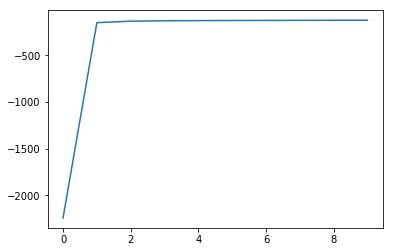

In [52]:
main()